In [1]:
import os
import cv2
import glob
import torch
import numpy as np
import pandas as pd
import albumentations
import matplotlib.pyplot as plt

from tqdm import tqdm
from torch.utils.data import Dataset

In [2]:
transform = albumentations.Compose([
    albumentations.Transpose(p=0.5),
    albumentations.VerticalFlip(p=0.5),
    albumentations.HorizontalFlip(p=0.5),
    albumentations.RandomBrightness(limit=0.2, p=0.75),
    albumentations.RandomContrast(limit=0.2, p=0.75),
    albumentations.OneOf([
        albumentations.MotionBlur(blur_limit=5),
        albumentations.MedianBlur(blur_limit=5),
        albumentations.GaussianBlur(blur_limit=5),
        albumentations.GaussNoise(var_limit=(5.0, 30.0)),
    ], p=0.7),

    albumentations.OneOf([
        albumentations.OpticalDistortion(distort_limit=1.0),
        albumentations.GridDistortion(num_steps=5, distort_limit=1.),
        albumentations.ElasticTransform(alpha=3),
    ], p=0.7),

    albumentations.CLAHE(clip_limit=4.0, p=0.7),
    albumentations.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
    albumentations.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
])


/home/sysadmin/miniconda3/envs/kltn2/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/sysadmin/miniconda3/envs/kltn2/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/sysadmin/miniconda3/envs/kltn2/lib/python3.8/site-packages/albumentations/augmentations/blur/transforms.py:184: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


In [3]:
path_image = "Data/ISIC2020_Segment_Cropt/train/malignant_skin/ISIC_0149568.jpg"

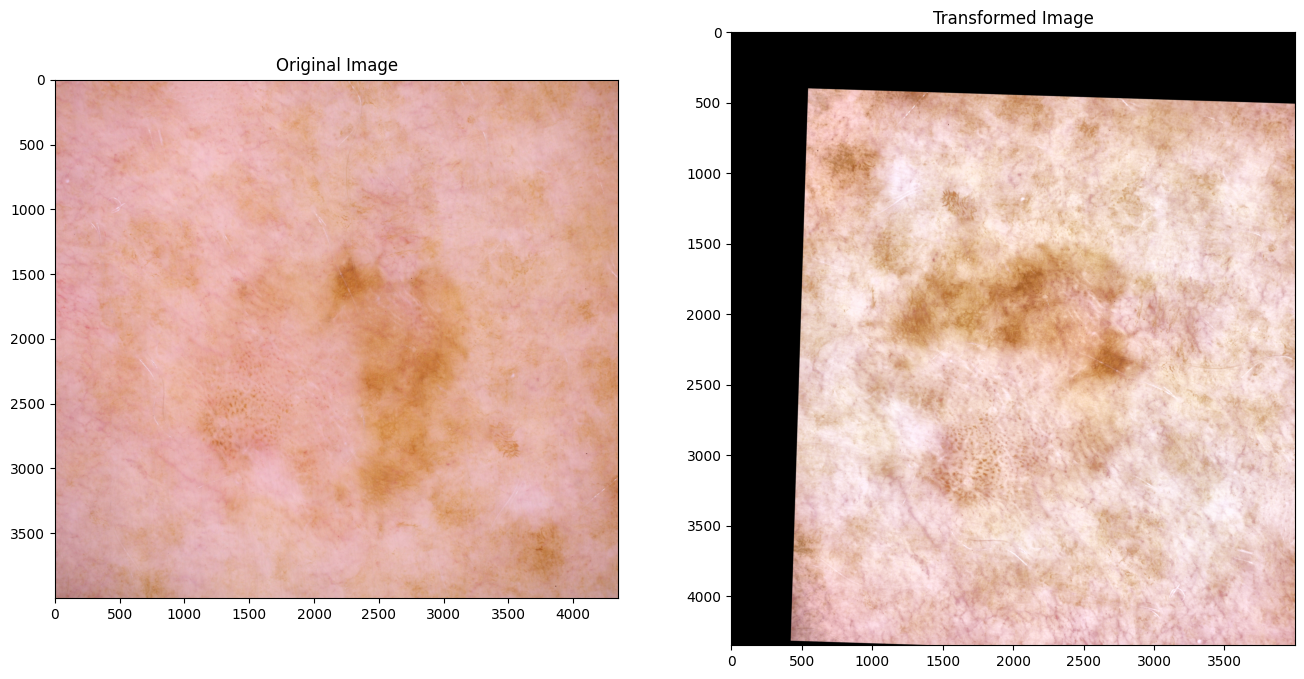

In [4]:
image = cv2.imread(path_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# using maplotly
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(image)
ax[0].set_title("Original Image")

transformed = transform(image=image)
transformed_image = transformed["image"]
ax[1].imshow(transformed_image)
ax[1].set_title("Transformed Image")

plt.show()

In [5]:
path_beign_skin = "Data/ISIC2020_Segment_Cropt/train/benign_skin"
path_malignant_skin = "Data/ISIC2020_Segment_Cropt/train/malignant_skin"
path_new_malignant_skin = "Data/ISIC2020_Segment_Cropt/train/new_malignant_skin"

In [6]:
image_beign_skin = glob.glob(os.path.join(path_beign_skin, "*.jpg"))
image_malignant_skin = glob.glob(os.path.join(path_malignant_skin, "*.jpg"))
print(len(image_beign_skin), len(image_malignant_skin))

26033 467


In [7]:
ratio_generate = len(image_beign_skin) // len(image_malignant_skin)
print(ratio_generate)

55


In [8]:
if not os.path.exists(path_new_malignant_skin):
    os.makedirs(path_new_malignant_skin)

In [9]:
def generate_new_malignant_skin(image_malignant_skin, path_new_malignant_skin, ratio_generate, transformed):
    for i in tqdm(range(len(image_malignant_skin))):
        image = cv2.imread(image_malignant_skin[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        for j in range(ratio_generate):
            transformed = transform(image=image)
            transformed_image = transformed["image"]
            transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)
            image_name = image_malignant_skin[i].split("/")[-1].split(".")[0] + "_{}.jpg".format(j)
            cv2.imwrite(os.path.join(path_new_malignant_skin, image_name), transformed_image)
        # save inmage _original
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        image_name = image_malignant_skin[i].split("/")[-1].split(".")[0] + "_original.jpg"
        cv2.imwrite(os.path.join(path_new_malignant_skin, image_name), image)

In [10]:
generate_new_malignant_skin(image_malignant_skin, path_new_malignant_skin, ratio_generate, transformed)

100%|██████████| 467/467 [7:37:29<00:00, 58.78s/it]   
